## 5. Grouping 

go over split-apply combine strategy and the groupby() function 

- understand and apply Split-Apply-Combine strategy to analyze grouped date 
- use groupby() to split a pandas.DataFrae by one or more columns 
- Calculate summary statistics for groups in a pandas.DataFrame 
- Use method chaining for efficient data analysis

In [1]:
import numpy as np
import pandas as pd

# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary statistics 

sum(): sum values in each column
count(): count non-NA values in each column
min() and max(): get the minimum and maximum value in each column
mean() and median(): get the mean and median value in each column,
std() and var(): get the standard deviation and variance in each column

In [2]:
# Get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [3]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## Grouping 
We want to calculate a certain statistic for each group 

Can do this with Split-Apply-Combine strategy. 
Split: Split data into logical groups (species, sex, island) 
Apply: Calculate some summary statistics on each group (avg flipper length by species) 
Combine: Combine the statistics calculated on each group back together 

For pandas.DataFrame or pandas.Series we can use groupby() to split 

syntax: 

df.groupby(columns_to_group_by).summary_method()


In [4]:
penguins.groupby('species')['flipper_length_mm']

get a groupby object which is like an intermediate step. Does not perform any calculations until we specify an operation 

In [5]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

Start with the penguins dataframe and then 
use groupby() to group the data frame by species and then 
select flipper_length_mm column and then 
calculate the mean() of this column with respect to groups



In [6]:
# Average flipper length per species
avg_flipper = (penguins.groupby("species")
                        .flipper_length_mm
                        .mean()
                        .rename('mean_flipper_length')
                        .sort_values(ascending=False)
                        )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

We want to know what was the number of penguins surveyed in each island on different years. We can use the count() method to count the number of non_NA values in each column like this : 

In [7]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

When we group by island and year we get the count of non-NA values for each column across each combination of island and year: 

In [8]:
penguins.groupby(['island', 'year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

If we wanted to plot the surveyed population per year and island. We could use method chaining to do this: 

<Axes: title={'center': 'Penguins surveyed at the Palmer Archipelago'}, ylabel='Island, Year'>

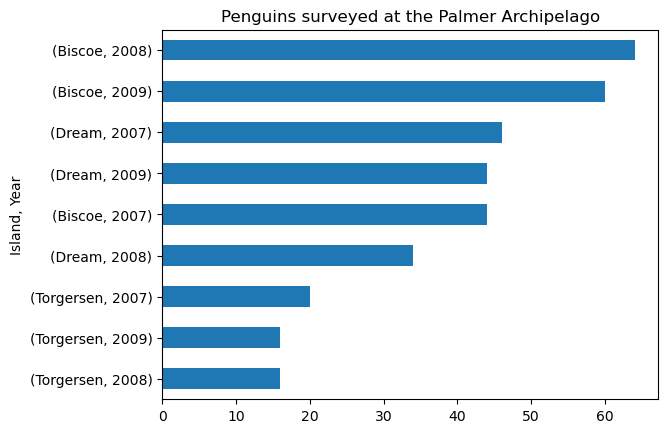

In [9]:
(penguins.groupby(['island', 'year'])
 .count()
 .species
 .sort_values()
 .plot(kind = 'barh', 
       title = 'Penguins surveyed at the Palmer Archipelago', 
       ylabel = ('Island, Year')) 
)

1. Use the max() method for pandas.DataFrames to calculate the maximum value of a penguin’s body mass by year and species

In [19]:
penguins.groupby(['year','species'])['body_mass_g'].max()

year  species  
2007  Adelie       4675.0
      Chinstrap    4400.0
      Gentoo       6300.0
2008  Adelie       4700.0
      Chinstrap    4800.0
      Gentoo       6000.0
2009  Adelie       4775.0
      Chinstrap    4450.0
      Gentoo       6000.0
Name: body_mass_g, dtype: float64

2. Use (1) to display the highest body masses per year and species as a bar plot in descending order.

<Axes: title={'center': 'Maximum Values of Penguin Body Mass by Year and Species'}, xlabel='Year, Species', ylabel='Penguin body mass (g)'>

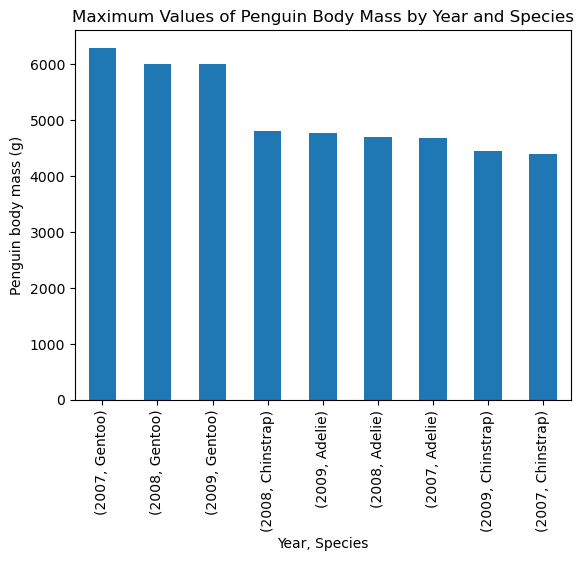

In [24]:
penguins.groupby(['year','species'])['body_mass_g'].max().sort_values(ascending=False).plot(kind = 'bar', 
                                                                                           ylabel = 'Penguin body mass (g)',
                                                                                           xlabel = 'Year, Species',
                                                                                            title = 'Maximum Values of Penguin Body Mass by Year and Species') 